# Метрическая классификация. Метод ближайших соседей и его развитие
# Практическая работа

## Цели практической работы
Научиться:
- строить модель методом ближайших соседей на реальных данных;
- правильно определять качество работы модели.


## Что входит в практическую работу


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Подобрать оптимальное число ближайших соседей методом leave-one-out.
- Получить качество модели с помощью F-меры и матрицы сопряжённости.

## Что оценивается

1. Выполнение всех этапов работы.
2. Наличие вывода по результатам.
3. Непереобученность модели.
4. Качество модели.


**Как отправить работу на проверку?**

1. Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачу. 
2. Сохраните изменения при помощи опции Save and Checkpoint из вкладки File или кнопки Save and Checkpoint на панели инструментов. 
3. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.




# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите дамп базы в Postgres. 
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности. 


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

1. Изучите состав БД с помощью инструмента отрисовки ERD-диаграмм (Entity Relationship diagram отображает все сущности БД, а также визуализирует связность таблиц). Соберите датасет следующей структуры из данных, имеющихся в базе:

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

2. Постройте модель зависимости TARGET от остальных параметров получившейся таблицы методом ближайших соседей.

3. Получите качество модели с помощью F-меры и матрицы сопряжённости.

Что нужно сделать после сбора таблицы:

In [1]:
# подключить необходимые библиотеки
import pandas as pd
import sklearn


In [2]:
# считать данные



# Путь к файлу
file_path = 'data_csv/exported.csv'  # замените на путь к вашему файлу

# Загрузка данных
df = pd.read_csv(file_path)

# Просмотр первых строк
print(df.head())


   target  client_id  age  gender            education  marital_status  \
0       0  106804370   49       1  Среднее специальное  Состою в браке   
1       0  106804371   32       1              Среднее  Состою в браке   
2       0  106804372   52       1     Неполное среднее  Состою в браке   
3       0  106804373   39       1               Высшее  Состою в браке   
4       0  106804374   30       0              Среднее  Состою в браке   

   child_total  dependants  socstatus_work_fl  socstatus_pens_fl  ...  \
0            2           1                  2                  1  ...   
1            3           3                  2                  1  ...   
2            4           0                  2                  1  ...   
3            1           1                  2                  1  ...   
4            0           0                  2                  1  ...   

   own_auto           family_income personal_income  \
0         0  от 10000 до 20000 руб.          5000.0   
1     

# EDA
## Распределение целевой переменной

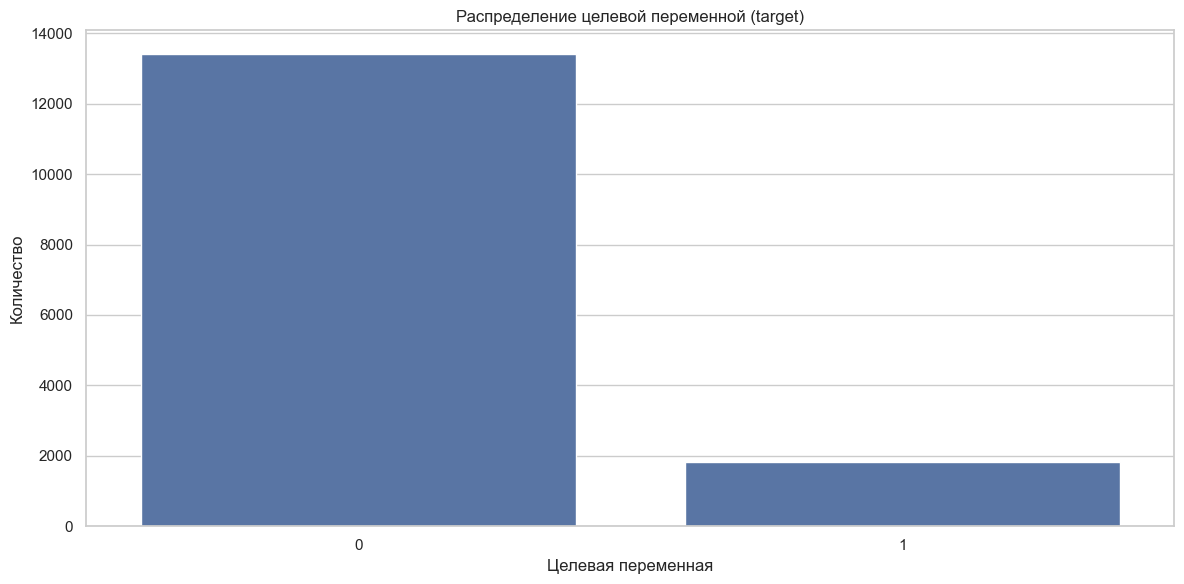

In [3]:
# EDA Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Настройки отображения
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 1. Распределение целевой переменной (target)
fig, ax = plt.subplots()
sns.countplot(data=df, x="target", ax=ax)
ax.set_title("Распределение целевой переменной (target)")
ax.set_xlabel("Целевая переменная")
ax.set_ylabel("Количество")
plt.tight_layout()
plt.show()

Вывод - есть дисбаланс классов, 0 появляется в выборке гораздо чаще чем 1

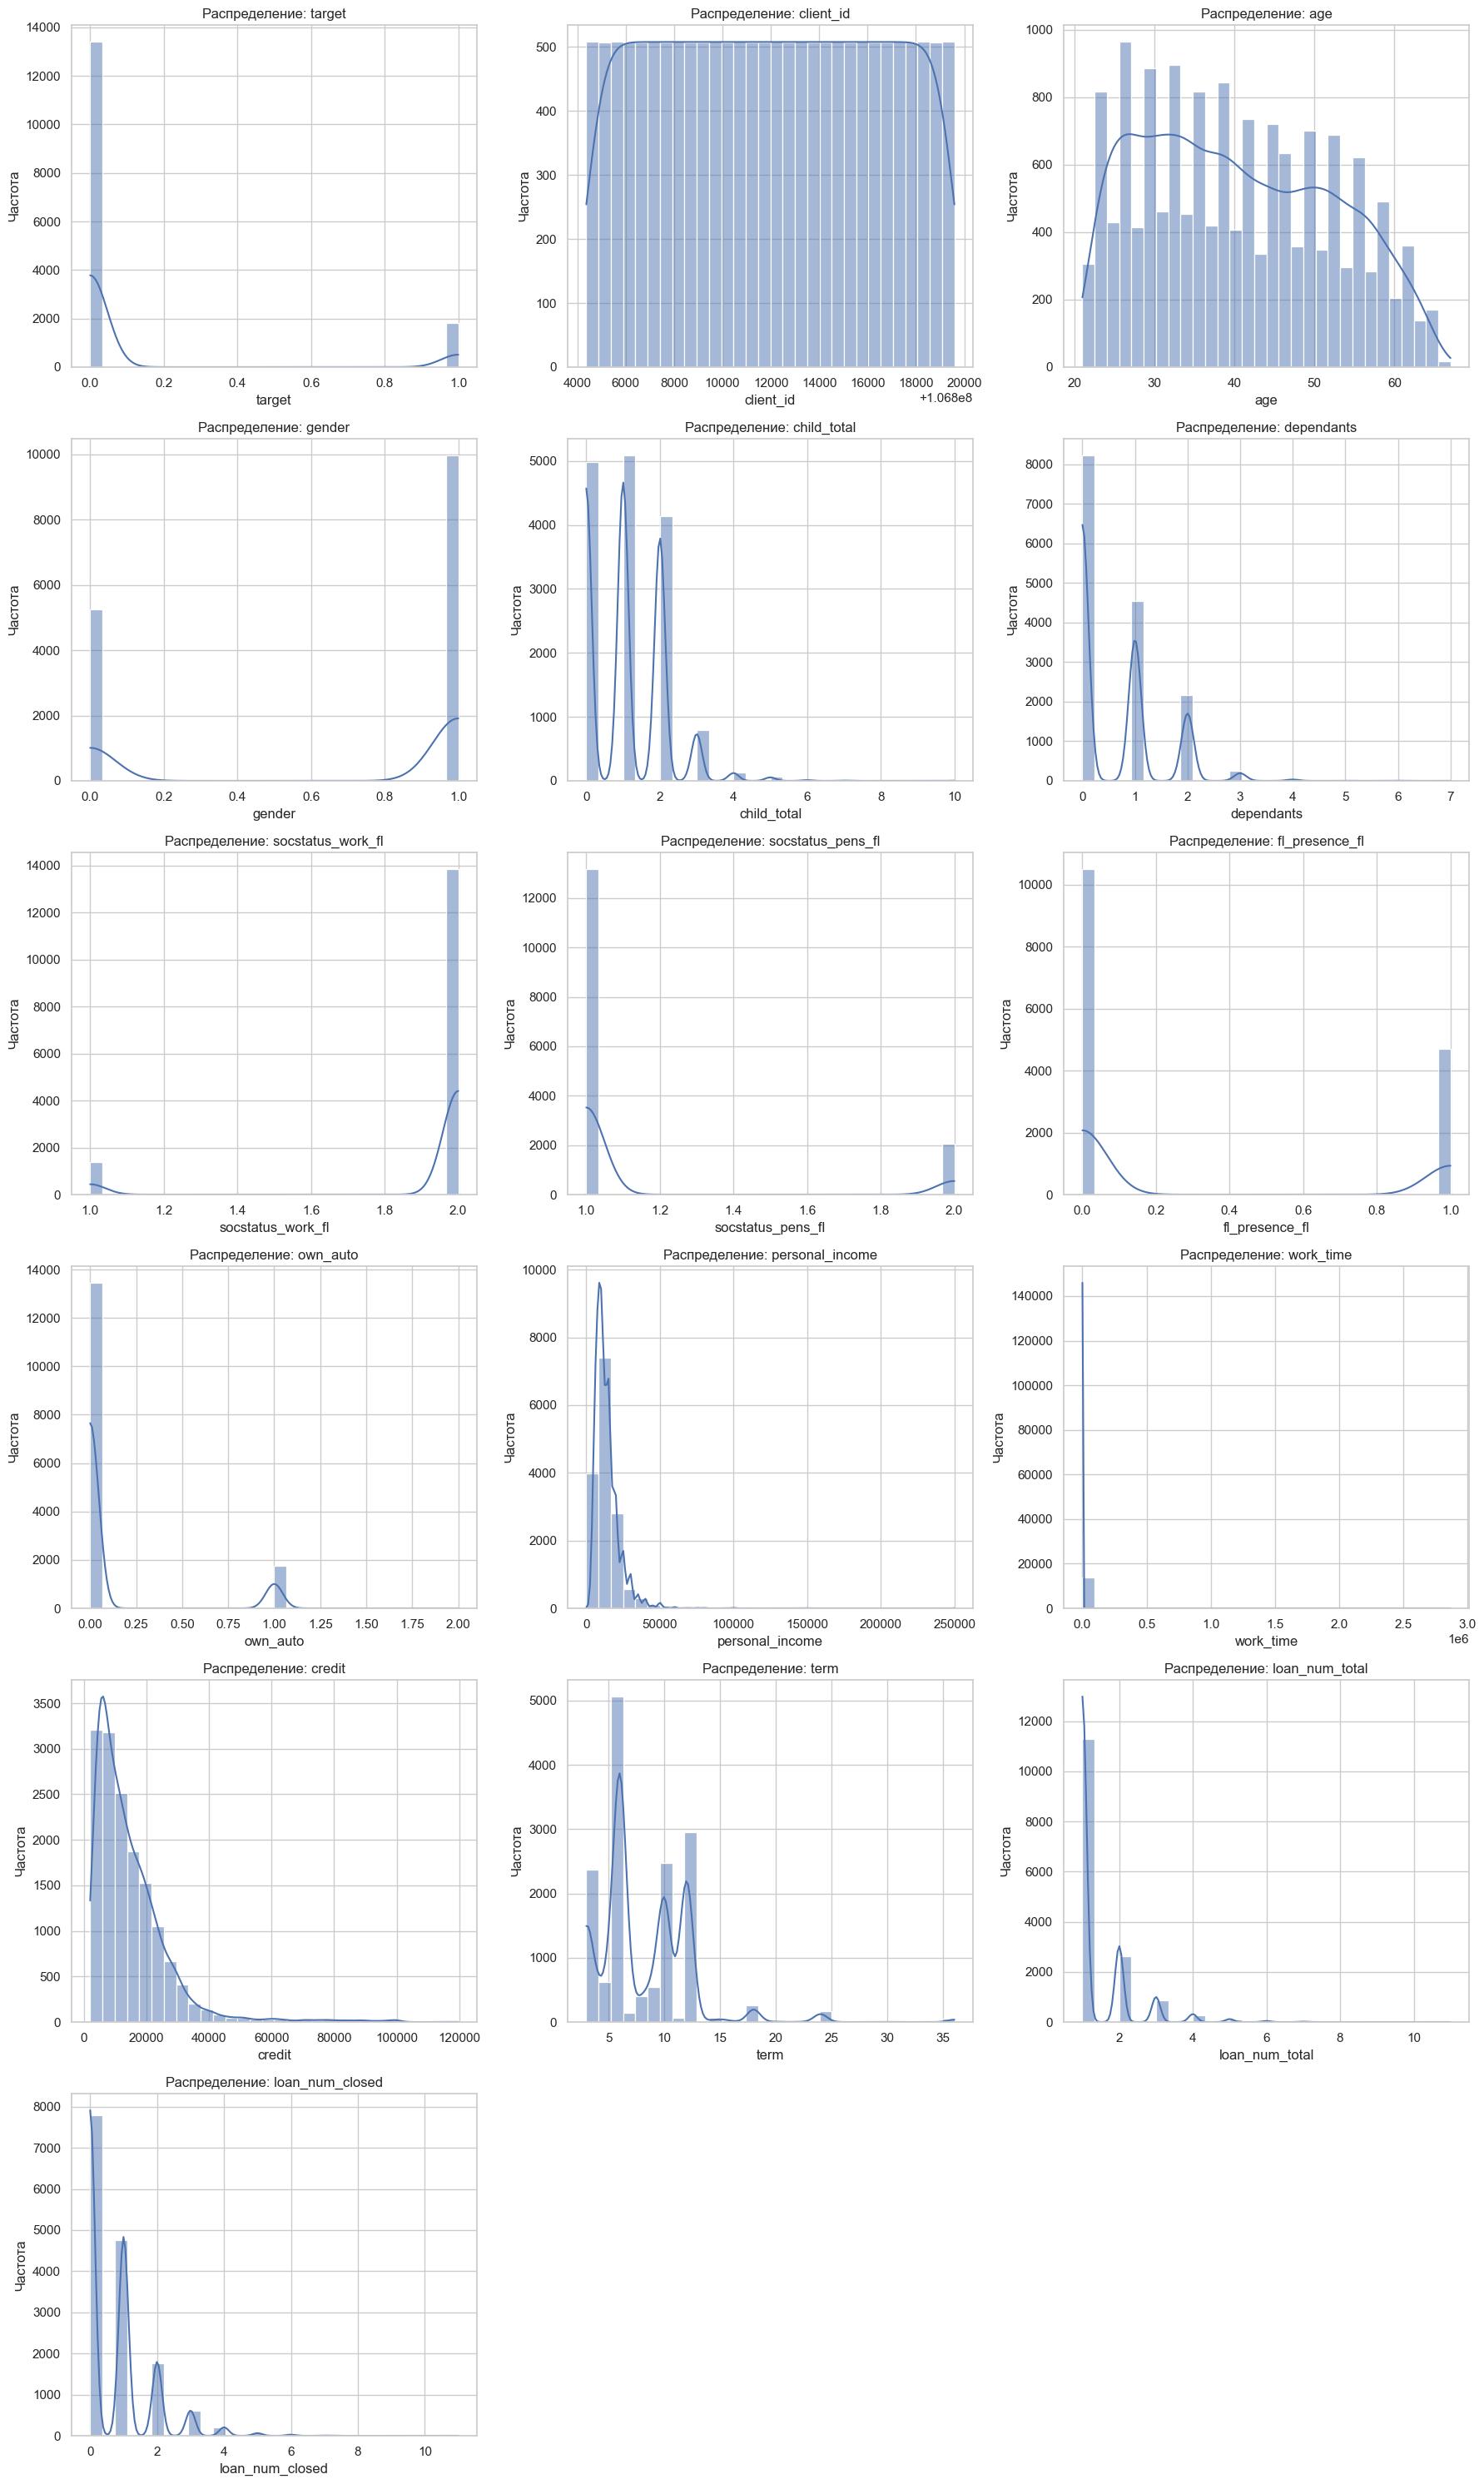

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Выбор только числовых признаков
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Определение количества строк и столбцов для подграфиков
ncols = 3
nrows = (len(numeric_columns) + ncols - 1) // ncols

# Создание подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"Распределение: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

# Удаление лишних подграфиков
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# проведите анализ данных, посмотрите на индивидуальные графики
# зависимости целевой функции и отдельной переменной
# создайте дополнительные переменные
# для работы с категориальными данными можно воспользоваться pd.get_dummies
# сделайте предварительные выводы

# УБРАТЬ СТОЛБЦЫ
cols_to_drop = ['education', 'marital_status', 'own_auto', 'family_income','gen_industry','gen_title','work_time', 'credit']
df = df.drop(columns=cols_to_drop)

# ЦЕЛЕВОЙ ПРИЗНАК
# TARGET

# КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ
# SOCSTATUS_WORK_FL SOCSTATUS_PENS_FL GENDER PERSONAL_INCOME
categorical_cols = ['socstatus_work_fl', 'socstatus_pens_fl', 'gender']

# Инициализируем и обучаем OneHotEncoder
ohe = OneHotEncoder(sparse_output=False).set_output(transform="pandas")  # drop='first' можно добавить, чтобы избежать dummy trap
# Применяем one-hot к категориальным признакам
ohe_array = ohe.fit_transform(df[categorical_cols])
# Преобразуем в DataFrame
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(categorical_cols))

# Объединяем с оригинальным DataFrame, удаляя оригинальные категориальные столбцы
df = df.drop(columns=categorical_cols)
df = pd.concat([df, ohe_df], axis=1)
print(df.head())

# ЧИСЛОВЫЕ ПРИЗНАКИ
# AGE CHILD_TOTAL DEPENDANTS LOAN_NUM_TOTAL LOAN_NUM_CLOSED PERSONAL_INCOME
# Столбцы для стандартизации
numeric_cols = ['age', 'child_total', 'dependants', 'loan_num_total', 'loan_num_closed', 'personal_income']
# Инициализируем и обучаем StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numeric_cols])
# Преобразуем в DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=numeric_cols, index=df.index)
print(scaled_df.head())
# соединяем с df так же как и категориальные
df = df.drop(columns=numeric_cols)
df = pd.concat([df, scaled_df], axis=1)
# Ваш код здесь

print('ГОТОВЫЕ ДАННЫЕ =>')
print(df.head())

   target  client_id  age  child_total  dependants  fl_presence_fl  \
0       0  106804370   49            2           1               0   
1       0  106804371   32            3           3               0   
2       0  106804372   52            4           0               0   
3       0  106804373   39            1           1               1   
4       0  106804374   30            0           0               0   

   personal_income  term  loan_num_total  loan_num_closed  \
0           5000.0     6               1                1   
1          12000.0     6               1                1   
2           9000.0    12               2                1   
3          25000.0     6               1                1   
4          12000.0    12               2                1   

   socstatus_work_fl_1  socstatus_work_fl_2  socstatus_pens_fl_1  \
0                  0.0                  1.0                  1.0   
1                  0.0                  1.0                  1.0   
2       

In [6]:
df.isnull().sum()

target                 0
client_id              0
fl_presence_fl         0
term                   0
socstatus_work_fl_1    0
socstatus_work_fl_2    0
socstatus_pens_fl_1    0
socstatus_pens_fl_2    0
gender_0               0
gender_1               0
age                    0
child_total            0
dependants             0
loan_num_total         0
loan_num_closed        0
personal_income        0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

df.isnull().sum()

# Подготовка
# Удалим client_id — это уникальный идентификатор
df = df.drop(columns=["client_id"])




In [8]:
# раздедлите на обучающую и тестовую выборки


# Разделим признаки и целевую переменную
X = X_prepared = df.drop("target", axis=1)
y = y_prepared = df["target"]

print(X_prepared.head())

# Ваш код здесь

   fl_presence_fl  term  socstatus_work_fl_1  socstatus_work_fl_2  \
0               0     6                  0.0                  1.0   
1               0     6                  0.0                  1.0   
2               0    12                  0.0                  1.0   
3               1     6                  0.0                  1.0   
4               0    12                  0.0                  1.0   

   socstatus_pens_fl_1  socstatus_pens_fl_2  gender_0  gender_1       age  \
0                  1.0                  0.0       0.0       1.0  0.740810   
1                  1.0                  0.0       0.0       1.0 -0.724621   
2                  1.0                  0.0       0.0       1.0  0.999415   
3                  1.0                  0.0       0.0       1.0 -0.121208   
4                  1.0                  0.0       1.0       0.0 -0.897024   

   child_total  dependants  loan_num_total  loan_num_closed  personal_income  
0     0.904792    0.436815       -0.488657 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score


from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score
import numpy as np

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y_prepared, test_size=0.2, random_state=42)

In [11]:
# обучите модель методом ближайших соседей
# Обучаем модель KNN с k=8 (лучший рассчитанный параметр на данный момент)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

# Предсказание и оценка
y_pred = knn.predict(X_test)

print('Отчет обучения по-умолчанию:')
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred))
print("\nОтчёт по классификации:\n", classification_report(y_test, y_pred, digits=3))
print("F1-мера:", f1_score(y_test, y_pred))


Отчет обучения по-умолчанию:
Матрица ошибок:
 [[2621   67]
 [ 347   10]]

Отчёт по классификации:
               precision    recall  f1-score   support

           0      0.883     0.975     0.927      2688
           1      0.130     0.028     0.046       357

    accuracy                          0.864      3045
   macro avg      0.506     0.502     0.486      3045
weighted avg      0.795     0.864     0.824      3045

F1-мера: 0.04608294930875576


In [ ]:
# подбираем k с помощью leave-one-out
print(X_prepared.head())
# Определим диапазон k
k_range = range(5, 21)

# Храним результаты
k_scores = []

loo = LeaveOneOut()

# Перебираем значения k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    y_true = []
    y_pred = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        
        y_true.append(y_test.iloc[0])
        y_pred.append(pred[0])
    
    acc = accuracy_score(y_true, y_pred)
    k_scores.append(acc)
    print(f"k={k}, LOOCV Accuracy={acc:.4f}")

# Лучшее значение k
best_k = k_range[np.argmax(k_scores)]
print(f"\n✅ Лучшее k по LOOCV: {best_k}, Accuracy = {max(k_scores):.4f}")

   fl_presence_fl  term  socstatus_work_fl_1  socstatus_work_fl_2  \
0               0     6                  0.0                  1.0   
1               0     6                  0.0                  1.0   
2               0    12                  0.0                  1.0   
3               1     6                  0.0                  1.0   
4               0    12                  0.0                  1.0   

   socstatus_pens_fl_1  socstatus_pens_fl_2  gender_0  gender_1       age  \
0                  1.0                  0.0       0.0       1.0  0.740810   
1                  1.0                  0.0       0.0       1.0 -0.724621   
2                  1.0                  0.0       0.0       1.0  0.999415   
3                  1.0                  0.0       0.0       1.0 -0.121208   
4                  1.0                  0.0       1.0       0.0 -0.897024   

   child_total  dependants  loan_num_total  loan_num_closed  personal_income  
0     0.904792    0.436815       -0.488657 

# сделайте вывод о работе модели

# Результаты LOOCV
k=1, LOOCV Accuracy=0.8070
k=2, LOOCV Accuracy=0.8725
k=3, LOOCV Accuracy=0.8540
k=4, LOOCV Accuracy=0.8758
k=5, LOOCV Accuracy=0.8679
k=6, LOOCV Accuracy=0.8785
k=7, LOOCV Accuracy=0.8757
k=8, LOOCV Accuracy=0.8797
k=9, LOOCV Accuracy=0.8785
# вероятно что при дальнейшем исследовании accuracy будет ближе к 99, но для ускорения задачи я взял
# результаты k=4

# Вывод => Обученная модель с k=8 верно предсказывает класс объекта c точностью 87.97%